# Importing Libraries

In [1]:
# Data Wrangling
import pandas as pd

# Computational Operations
import numpy as np

# For ploting graph / Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing, Model, Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.simplefilter("ignore")

# Loading & Basic Exploration

In [2]:
# Read the csv file
diab = pd.read_csv("diabetes.csv")

In [3]:
# Display the first few rows of the DataFrame for initial data exploration
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Pregnancies', 'Glucose'], ['Glucose', 'BloodPressure'], ['BloodPressure', 'SkinThickness'], ['SkinThickness', 'Insulin']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Insulin', 'Pregnancies', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Insulin', 'Glucose', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['Insulin', 'BloodPressure', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['Insulin', 'SkinThickness', None], **{})
chart

In [4]:
# Get the dimension of the DataFram (rows, columns)
diab.shape

(768, 9)

In [5]:
# Get a summary of the DataFrame's information including data types, non-null counts, and memory usage
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Generate summary statistics for the 'diab' DataFrame
diab.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

# EDA (Exploratory Data Analysis)

### ANALYZING COLUMN DISTRIBUTION

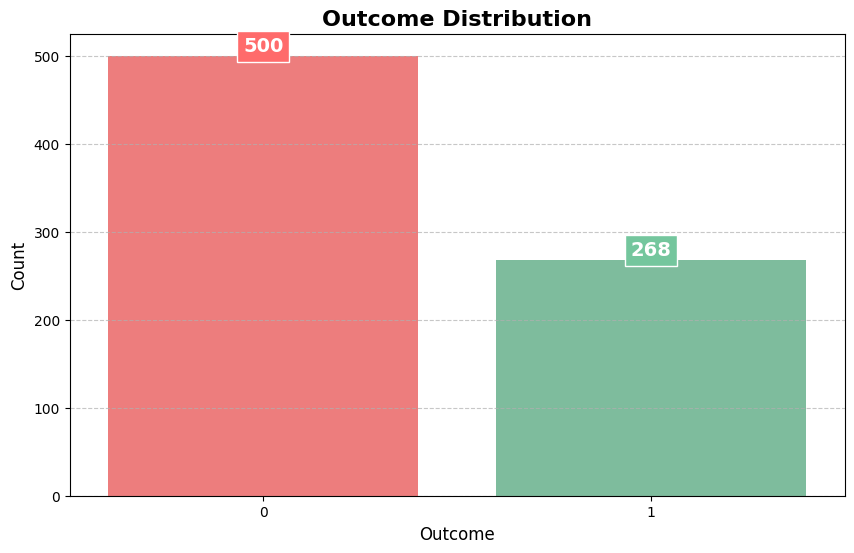

In [7]:
outcome_count = diab['Outcome'].value_counts()

bar_colors = ['#FF6B6B', '#74C69D']
text_box_colors = ['white', 'white']
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome_count.index, y=outcome_count.values, palette=bar_colors)
plt.title('Outcome Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, count in enumerate(outcome_count):
  plt.text(i, count, str(count), ha='center', va='bottom', fontsize=14, fontweight='bold', color='white', bbox=dict(facecolor=bar_colors[i], edgecolor=text_box_colors[i], boxstyle='square'))

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [8]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 7)
plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")

palette = sns.color_palette("Set1")

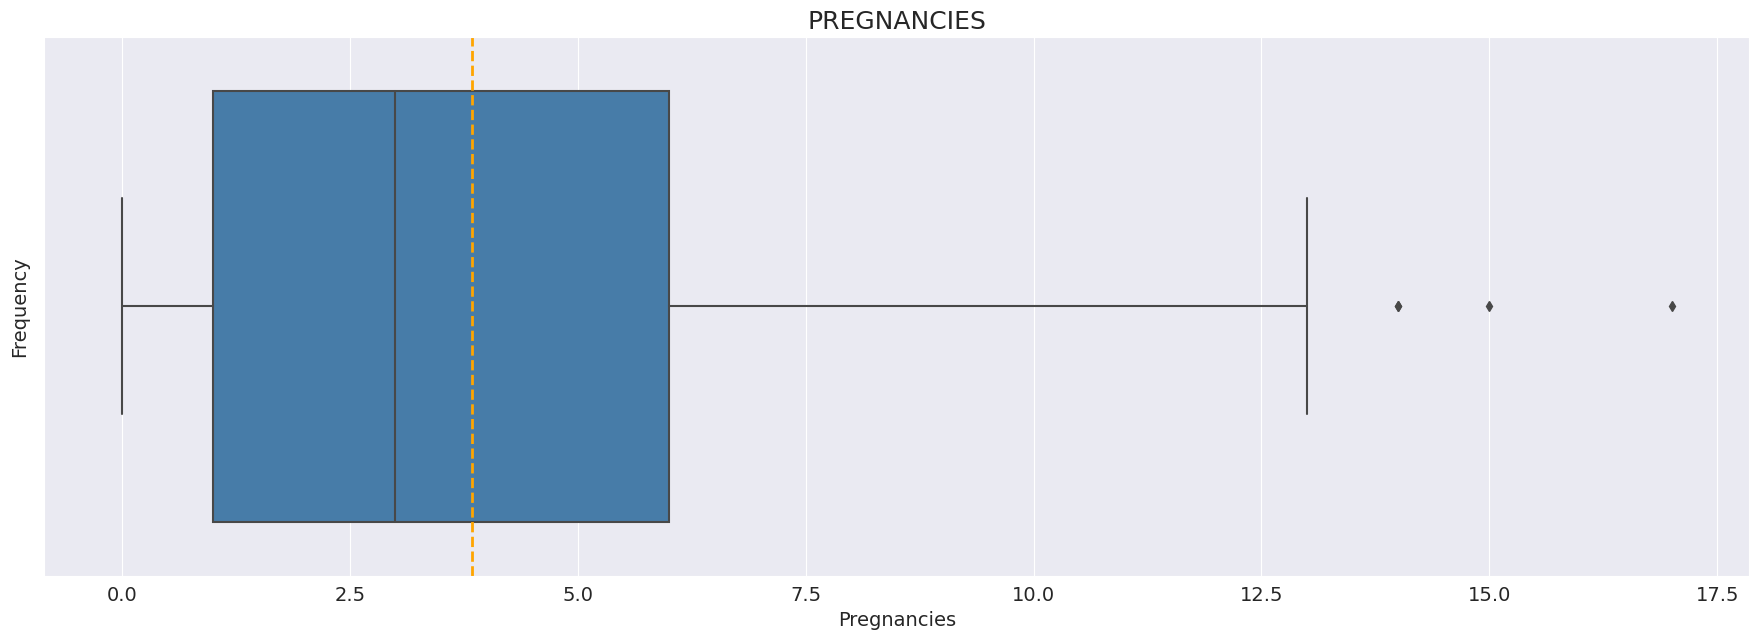

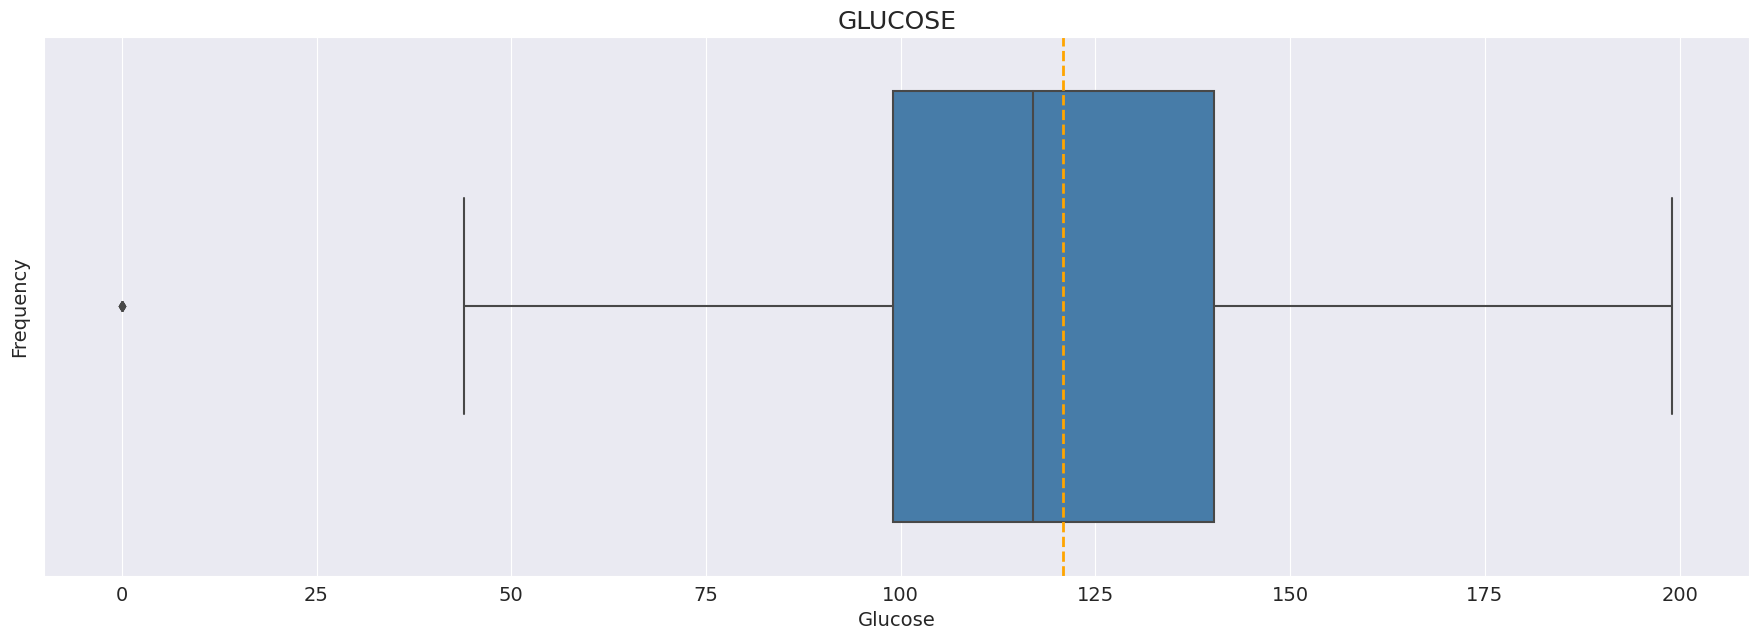

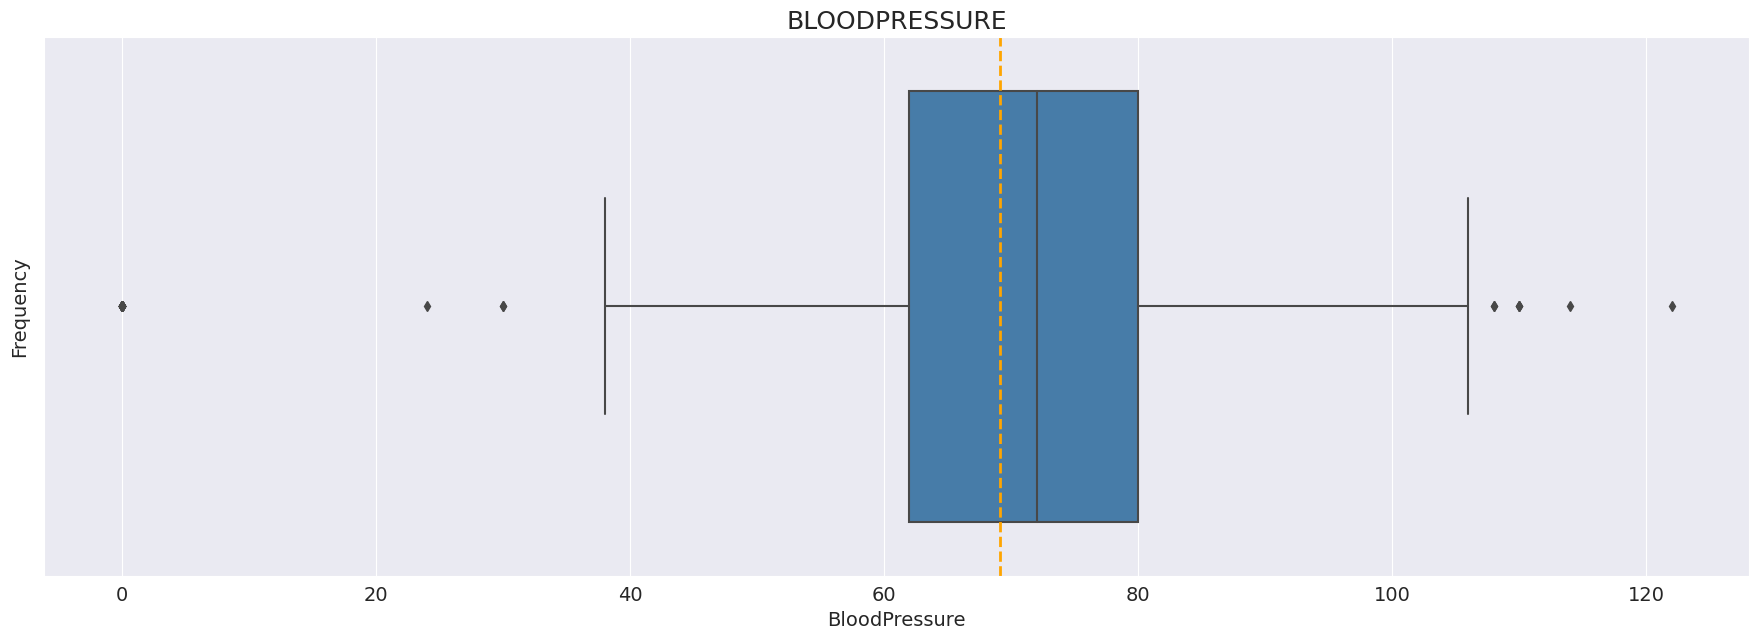

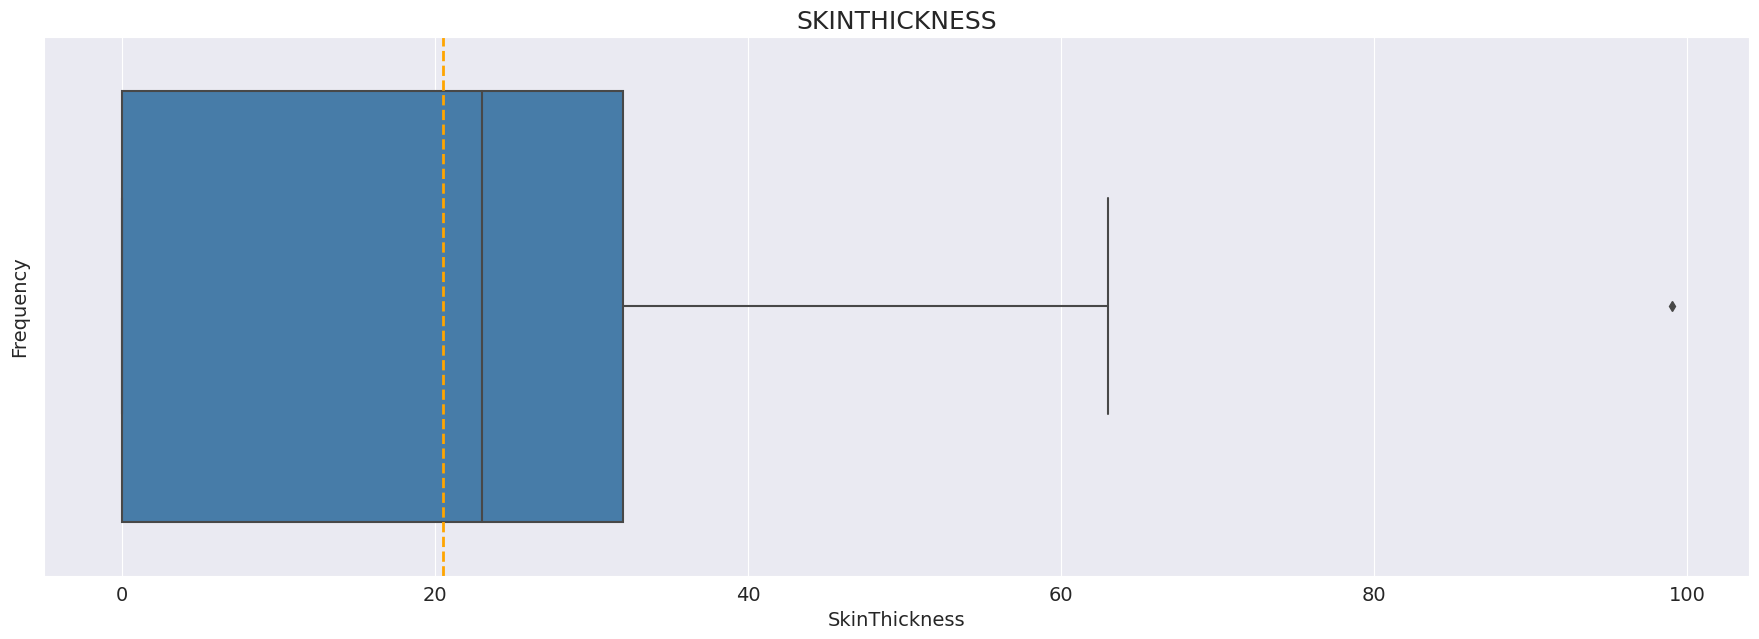

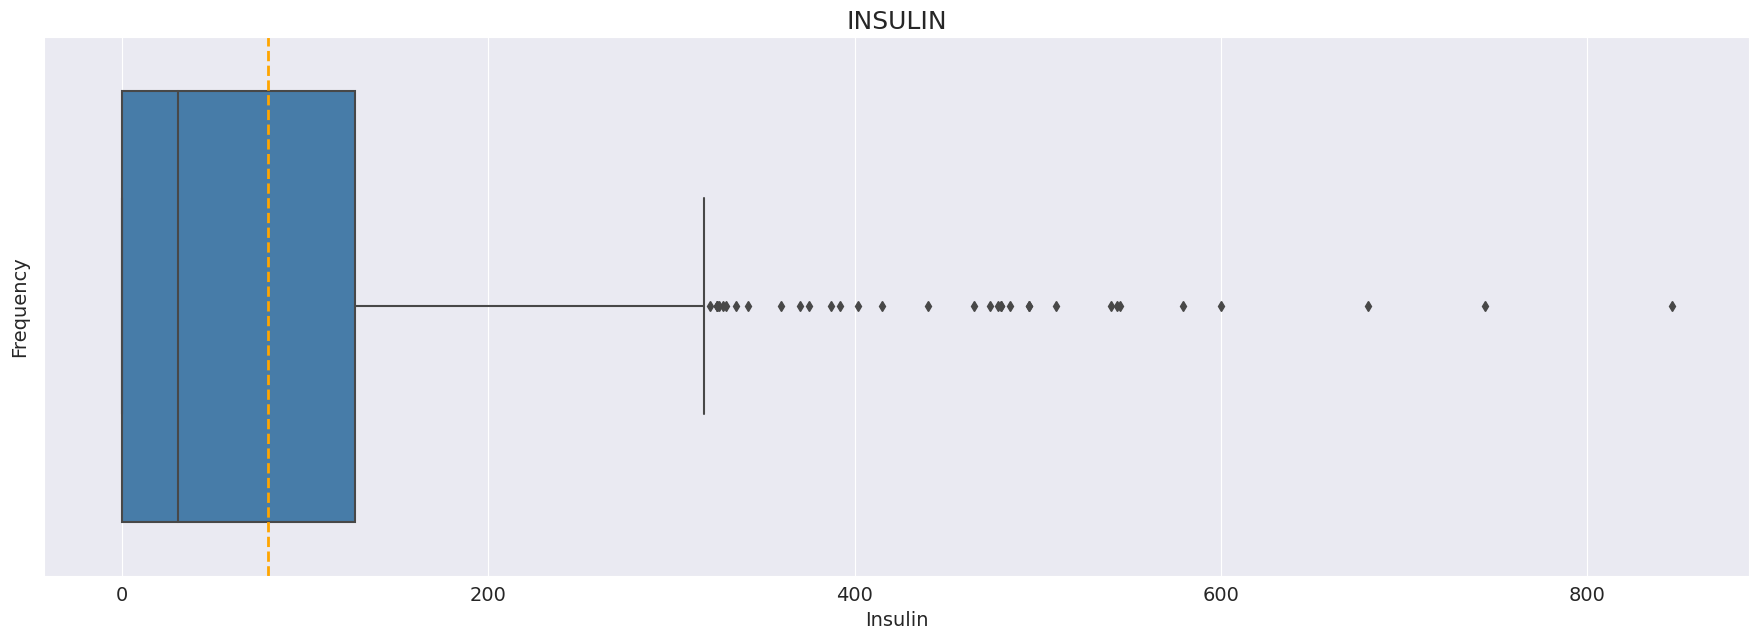

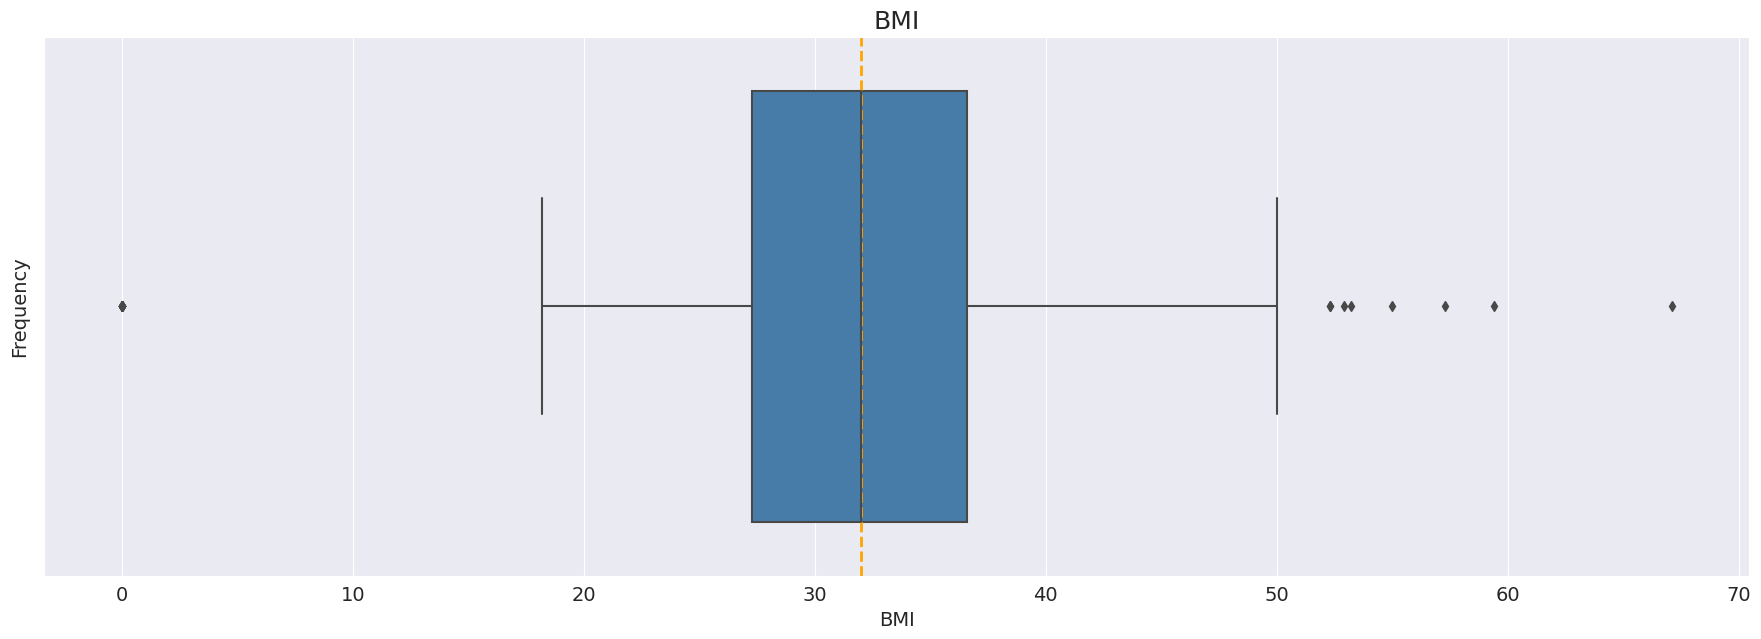

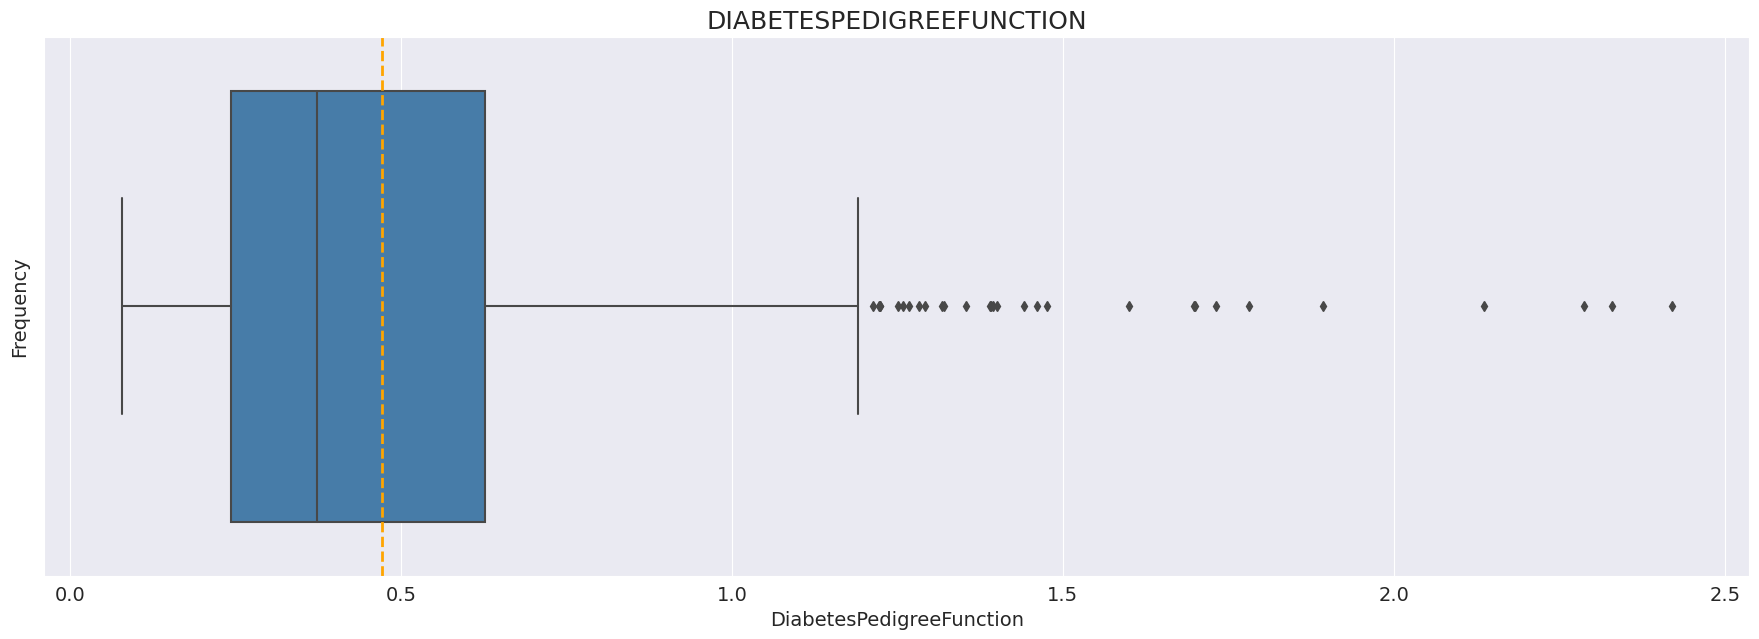

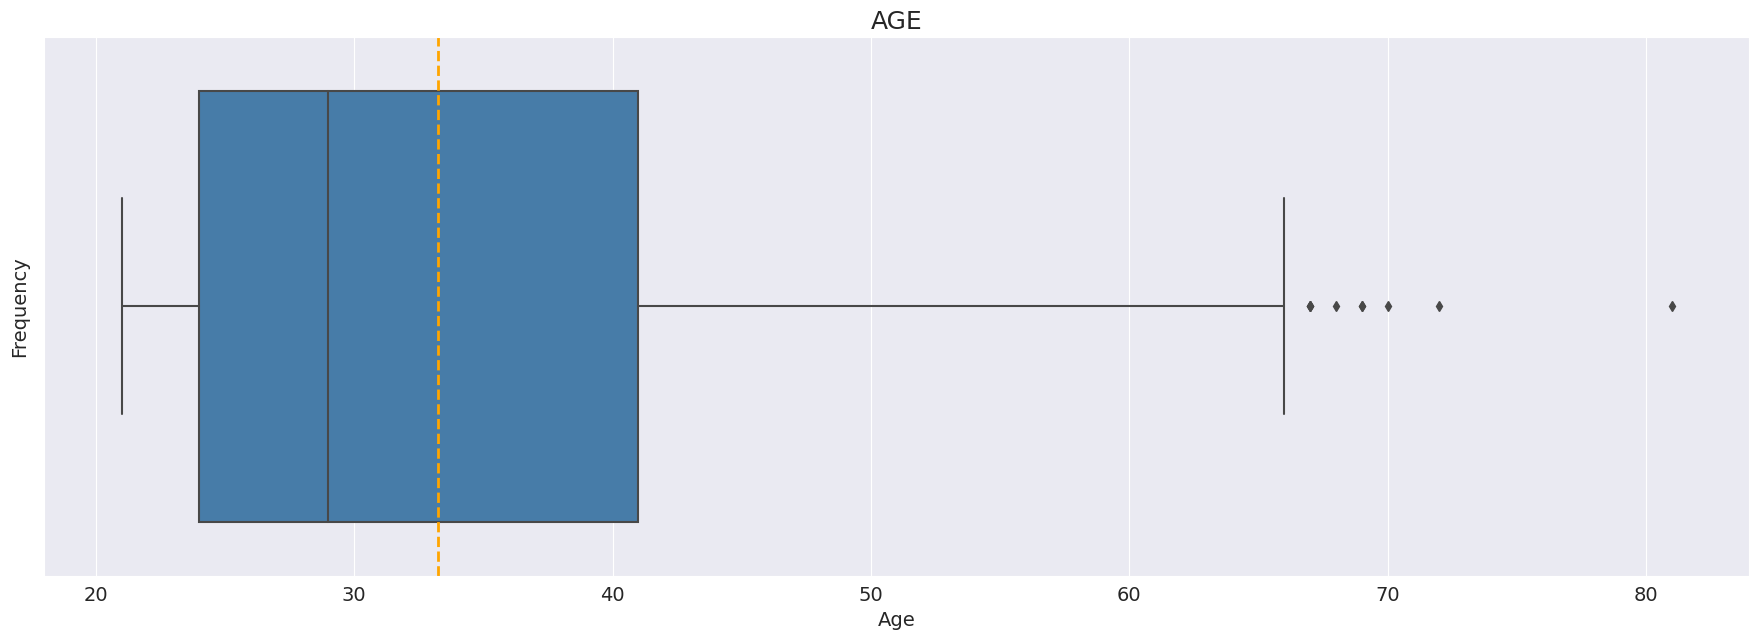

In [9]:
for col in diab.columns[:-1]:
  ax = sns.boxplot(data = diab, x = col, color=palette[1])
  plt.axvline(diab[col].mean(), linestyle='--', lw=2, zorder=1, color='orange')
  plt.title(col.upper(), fontsize=18)
  plt.ylabel('Frequency', fontsize=14)
  plt.show()

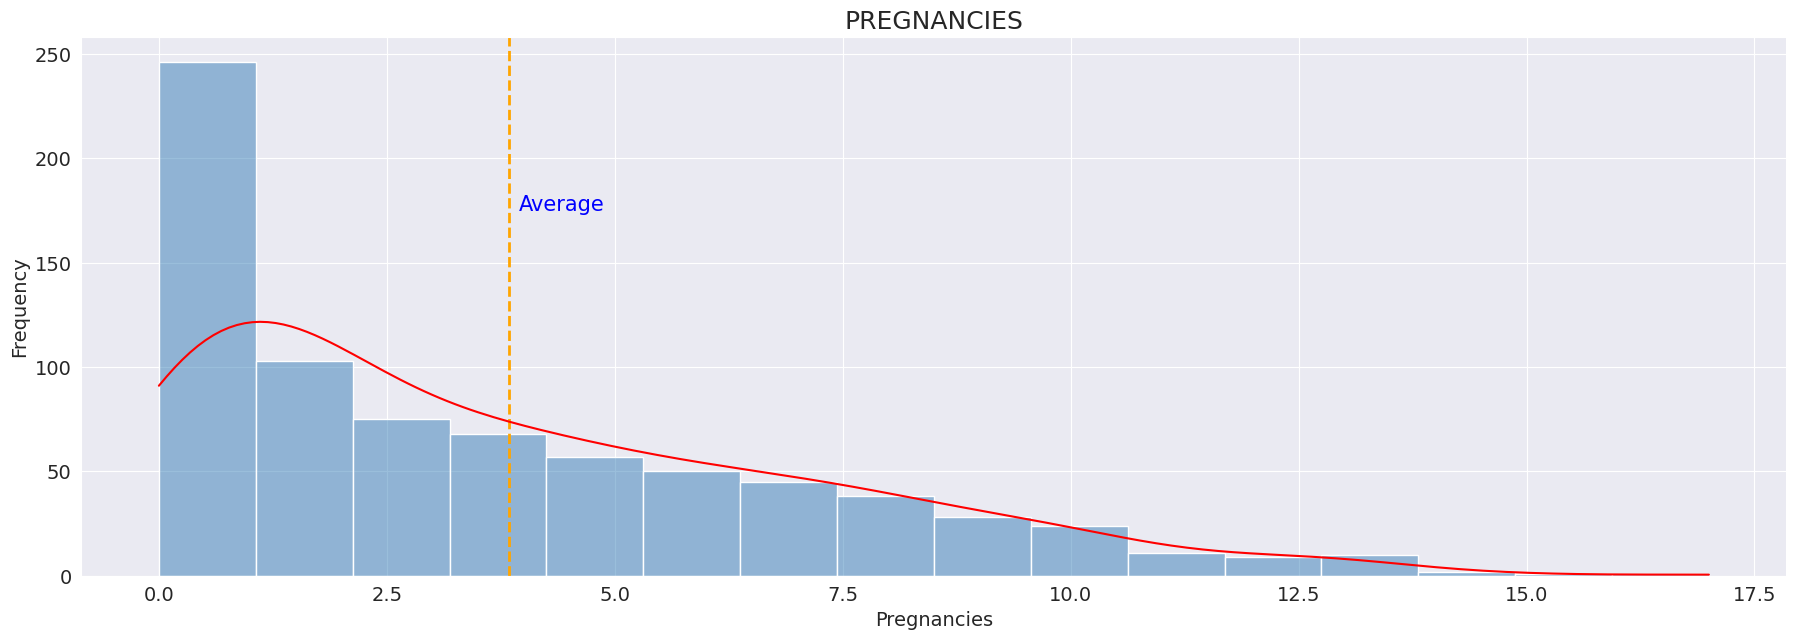

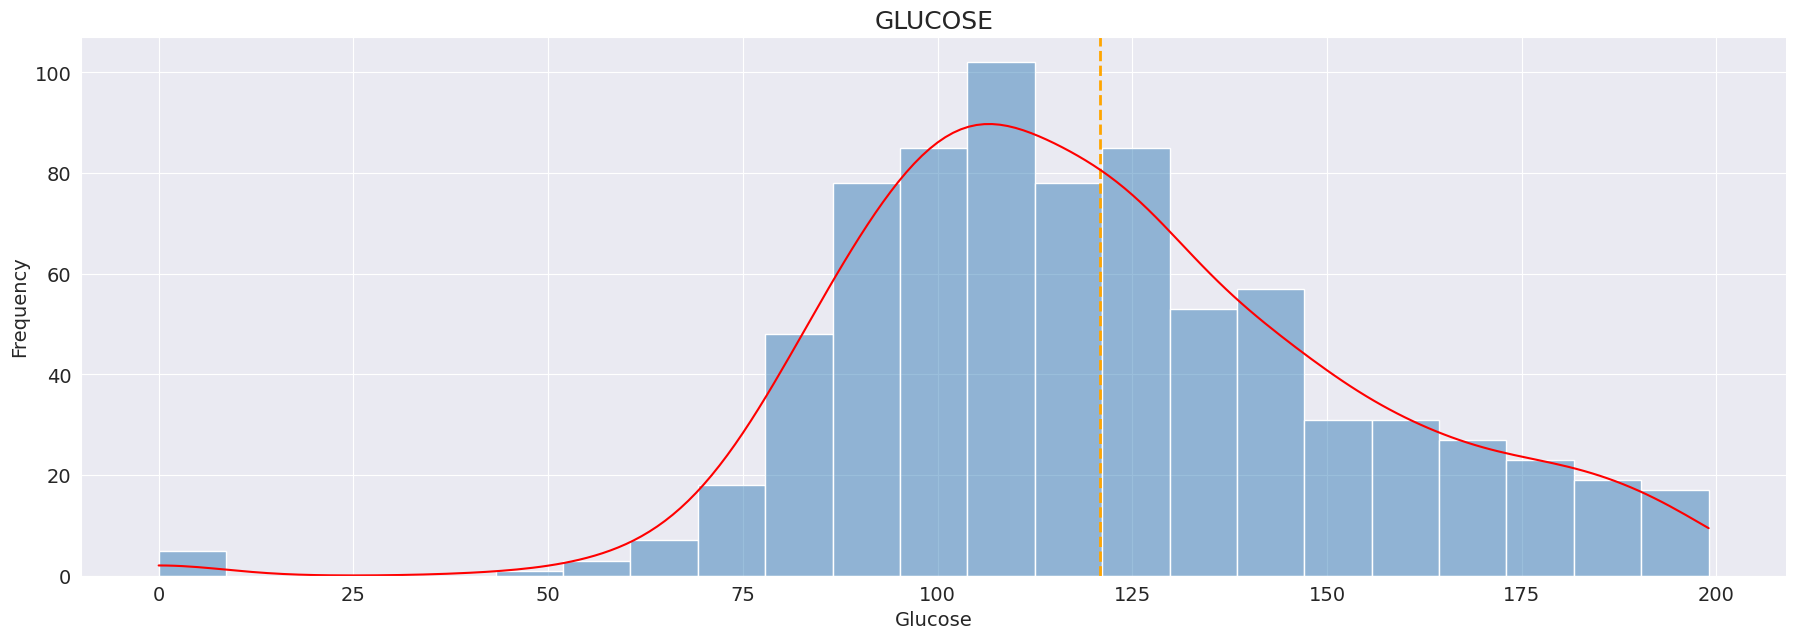

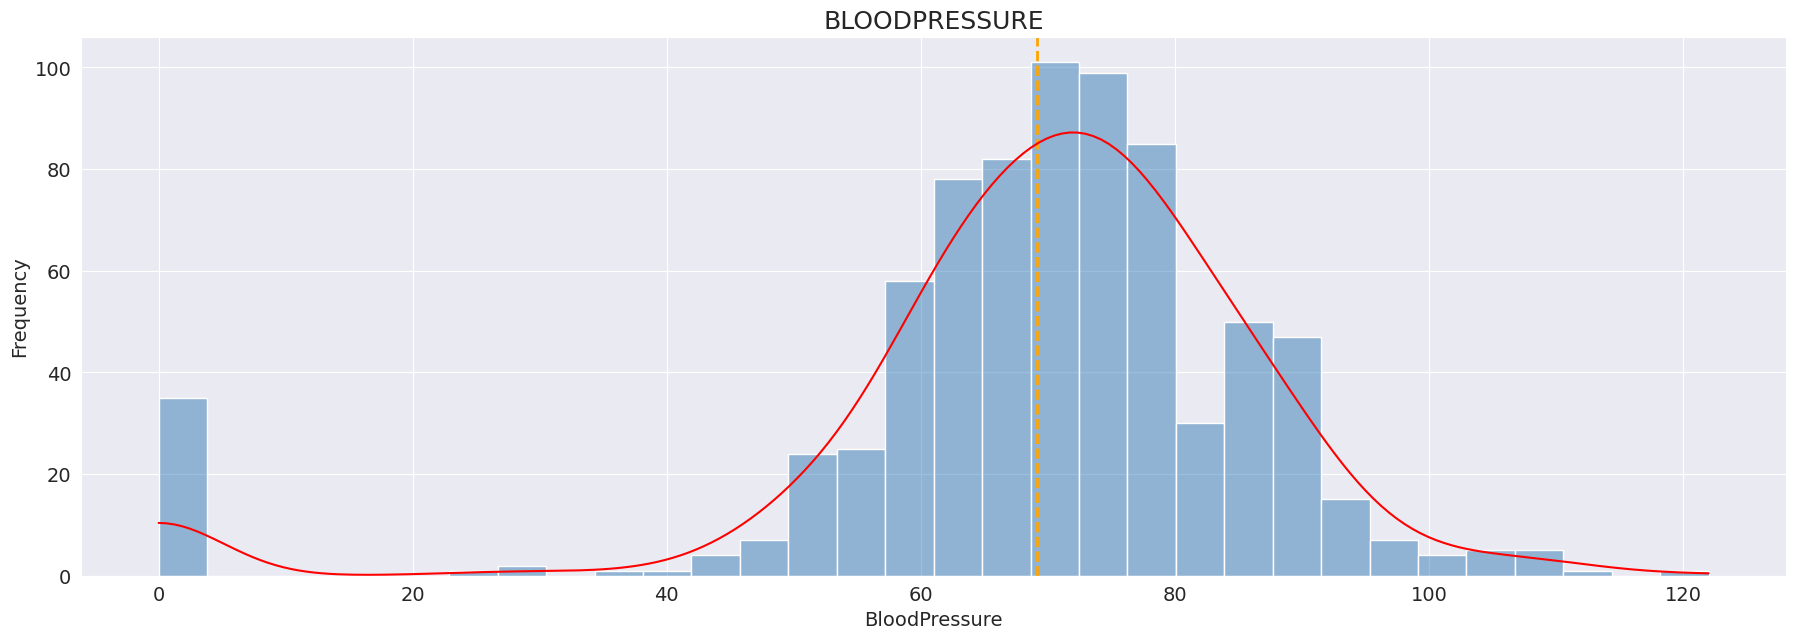

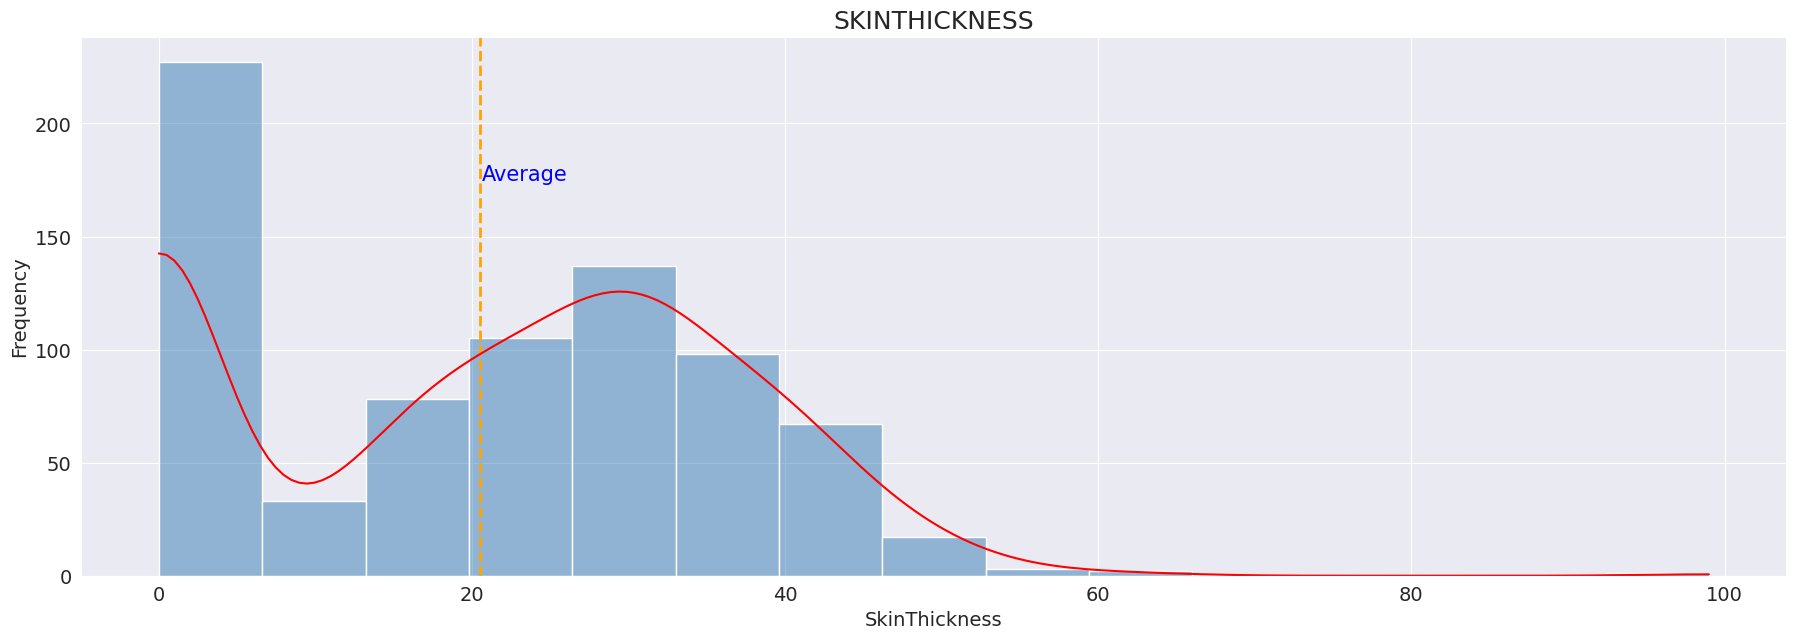

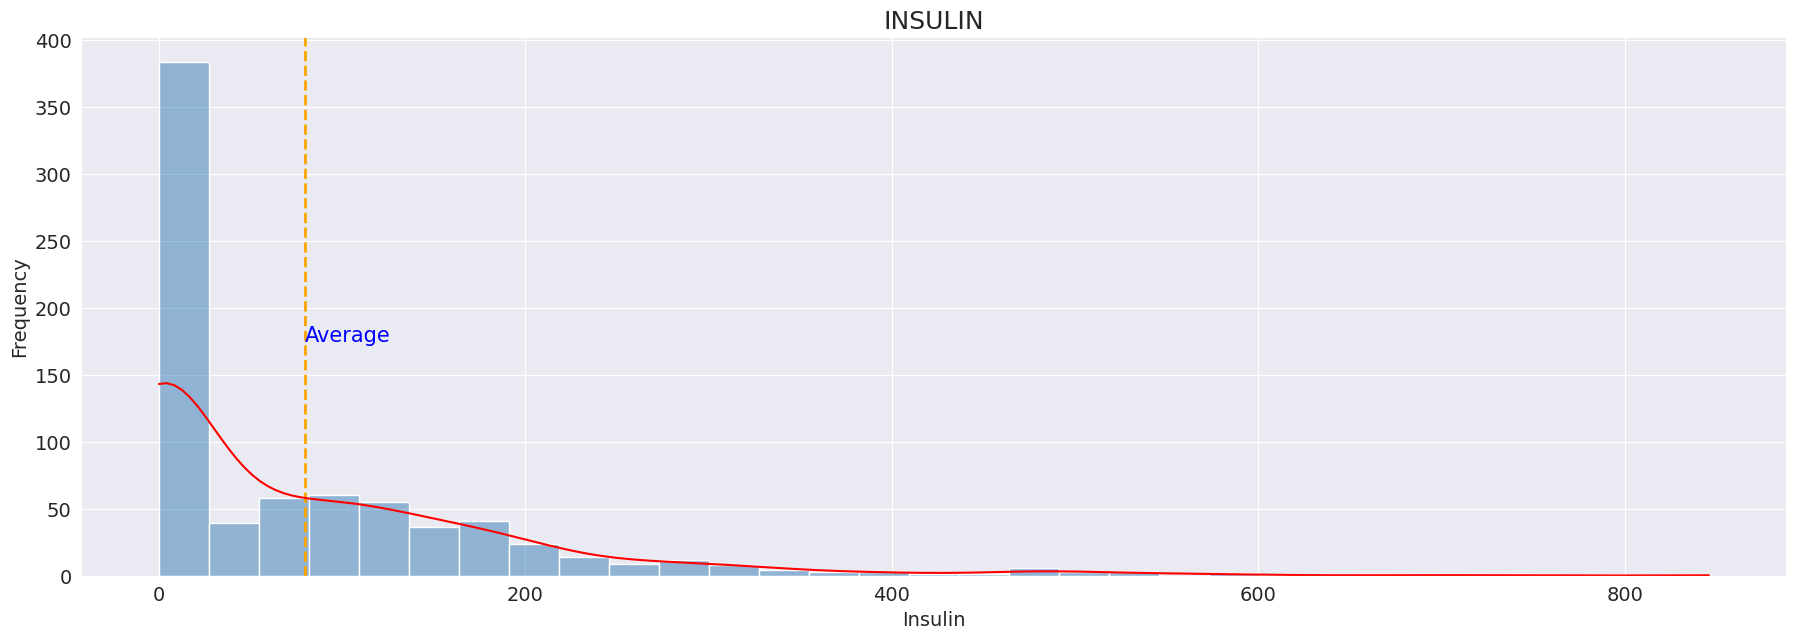

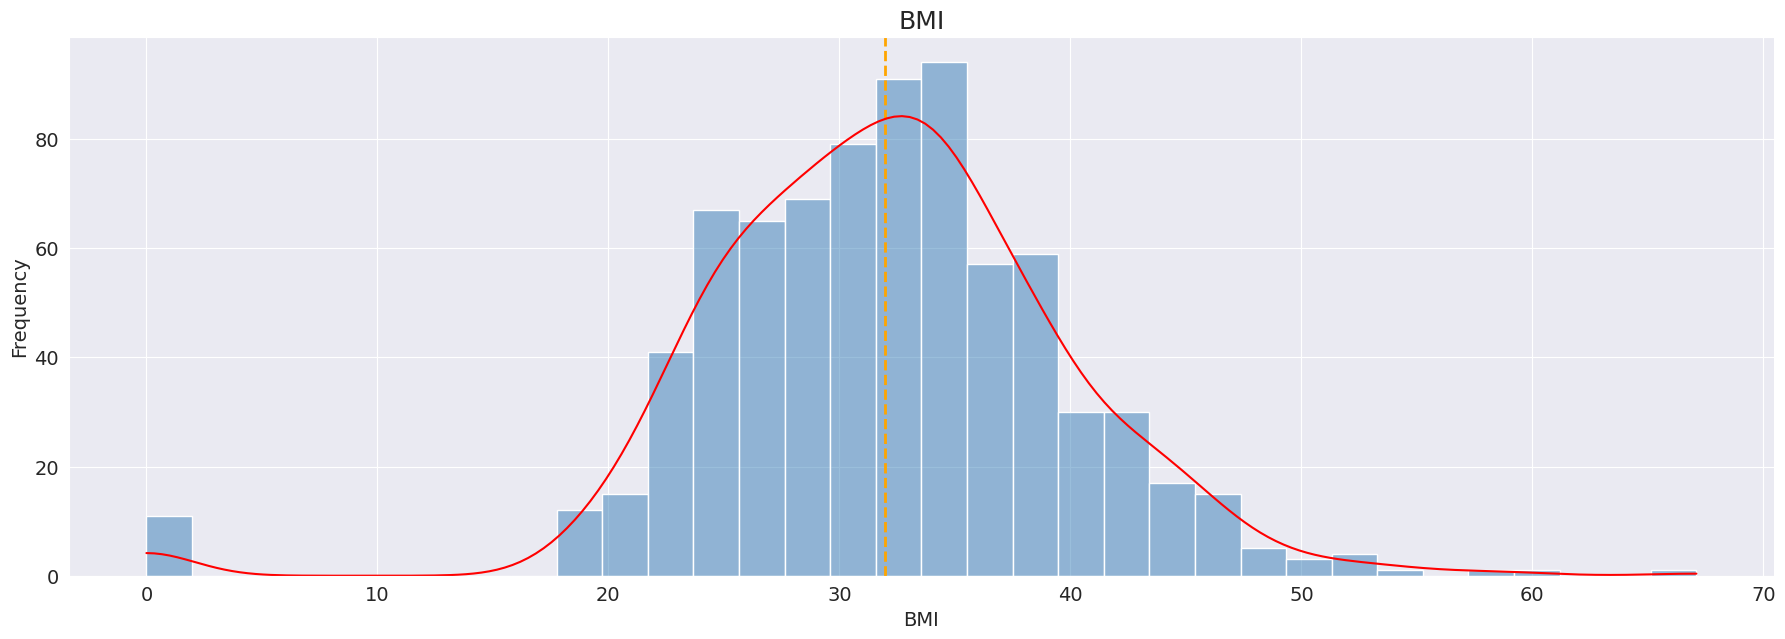

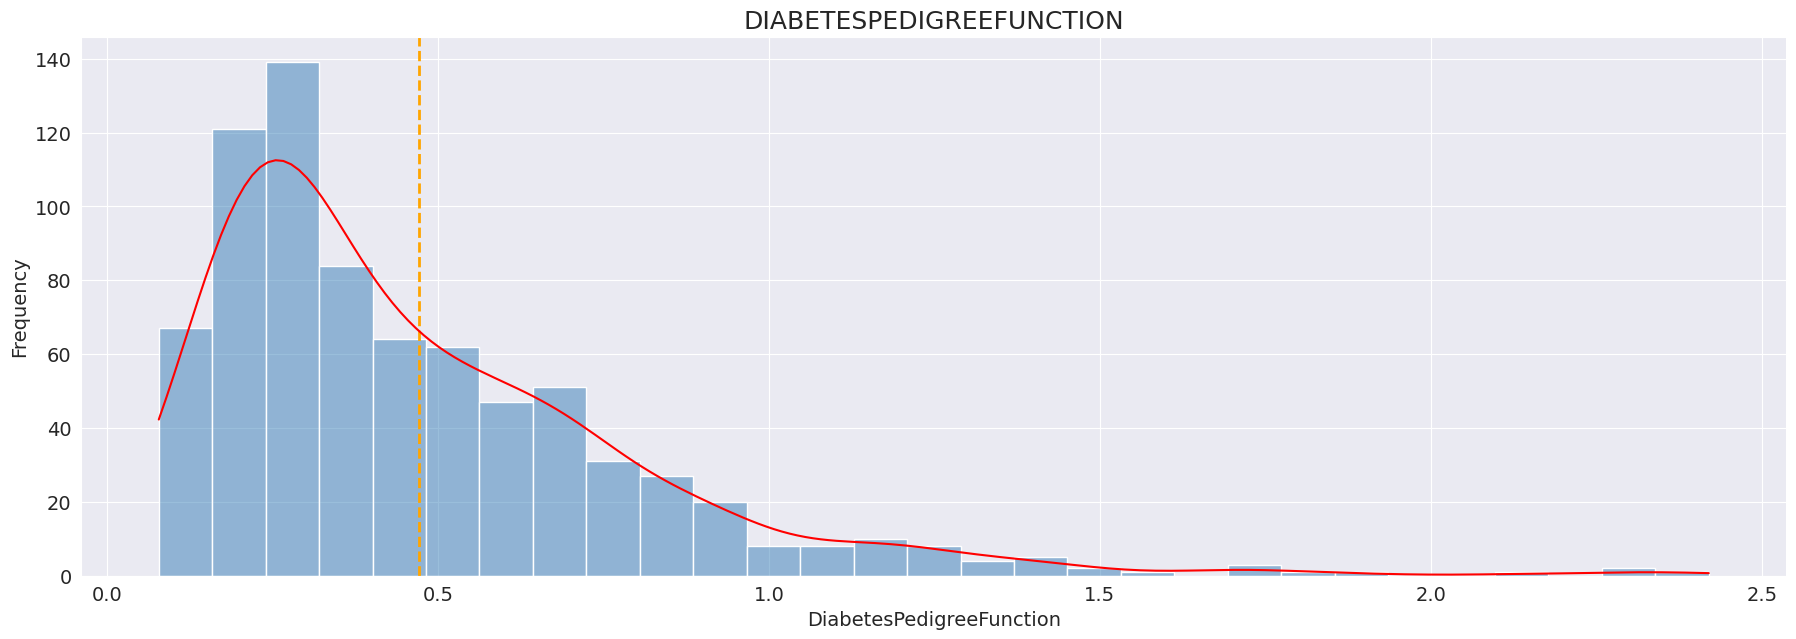

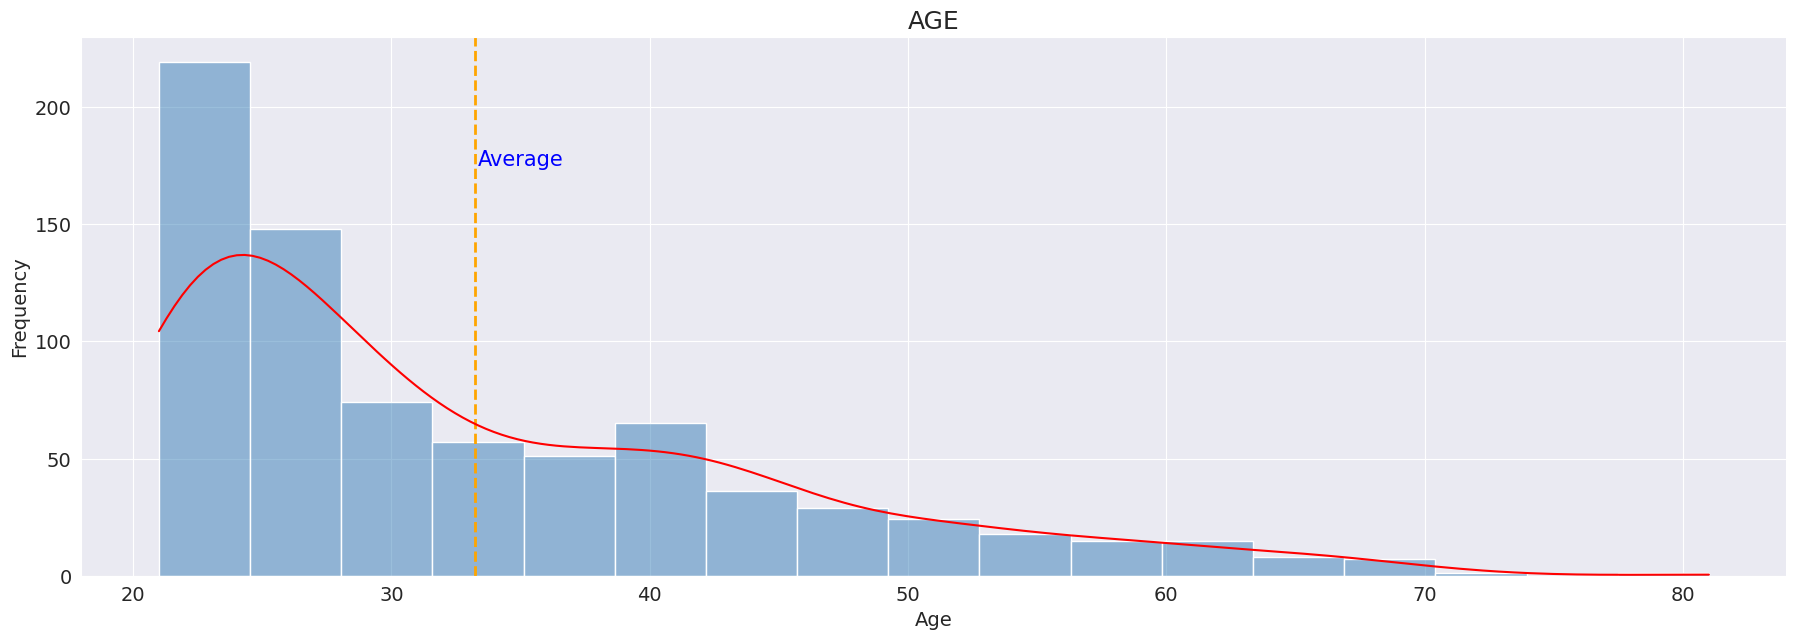

In [10]:
for col in diab.columns[:-1]:
  ax = sns.histplot(data = diab, x = col, kde = True, color=palette[1])
  ax.lines[0].set_color('red')
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.axvline(diab[col].mean(), linestyle='--', lw=2, zorder=1, color='orange')
  plt.annotate(f'Average', (diab[col].mean()+0.1, 175), fontsize=15, color='blue')
  plt.title(col.upper(), fontsize=18)
  plt.ylabel('Frequency', fontsize=14)
  plt.show()

# **Data Preprocessing**

### **MANAGING MISSING VALUES**


In [11]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [12]:
diab[columns_to_replace] = diab[columns_to_replace].replace(0, np.nan)

In [13]:
diab.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
fill_with_median = ['Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
fill_with_mean = ['BloodPressure', 'BMI']

In [15]:
for col in fill_with_median:
  median_value = diab[col].median()
  diab[col].fillna(median_value, inplace = True)

for col in fill_with_mean:
  mean_value = diab[col].mean()
  diab[col].fillna(mean_value, inplace = True)

### **DEALING WITH OUTLIERS**

In [16]:
# Calculate IQR, lower bound, and upper bound for all columns in the dataset
Q1= diab.quantile(0.25)
Q3= diab.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = pd.Series(False, index=diab.index)
for col in diab.columns:
  is_outlier = (diab[col] < lower_bound[col]) | (diab[col] > upper_bound[col])
  outlier_mask |= is_outlier

diab_no_outliers = diab[~outlier_mask]

In [17]:
diab_no_outliers.skew()

Pregnancies                 0.511869
Glucose                     0.539863
BloodPressure               0.196540
SkinThickness              -0.110164
Insulin                    -0.324861
BMI                         0.424330
DiabetesPedigreeFunction    1.189008
Age                         0.849856
Outcome                     0.549622
dtype: float64

### **POST-PREPROCESSING COLUMN DISTRIBUTIONS**

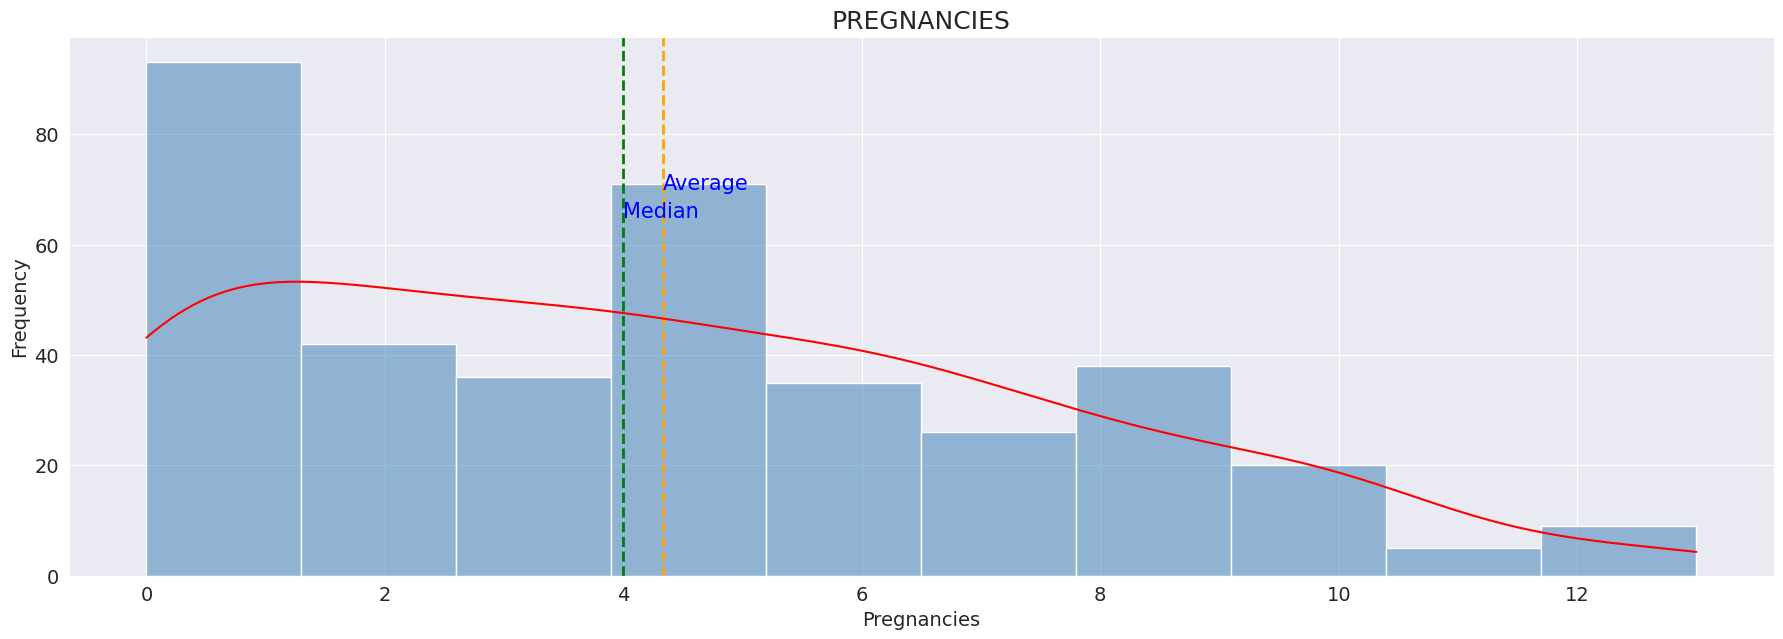

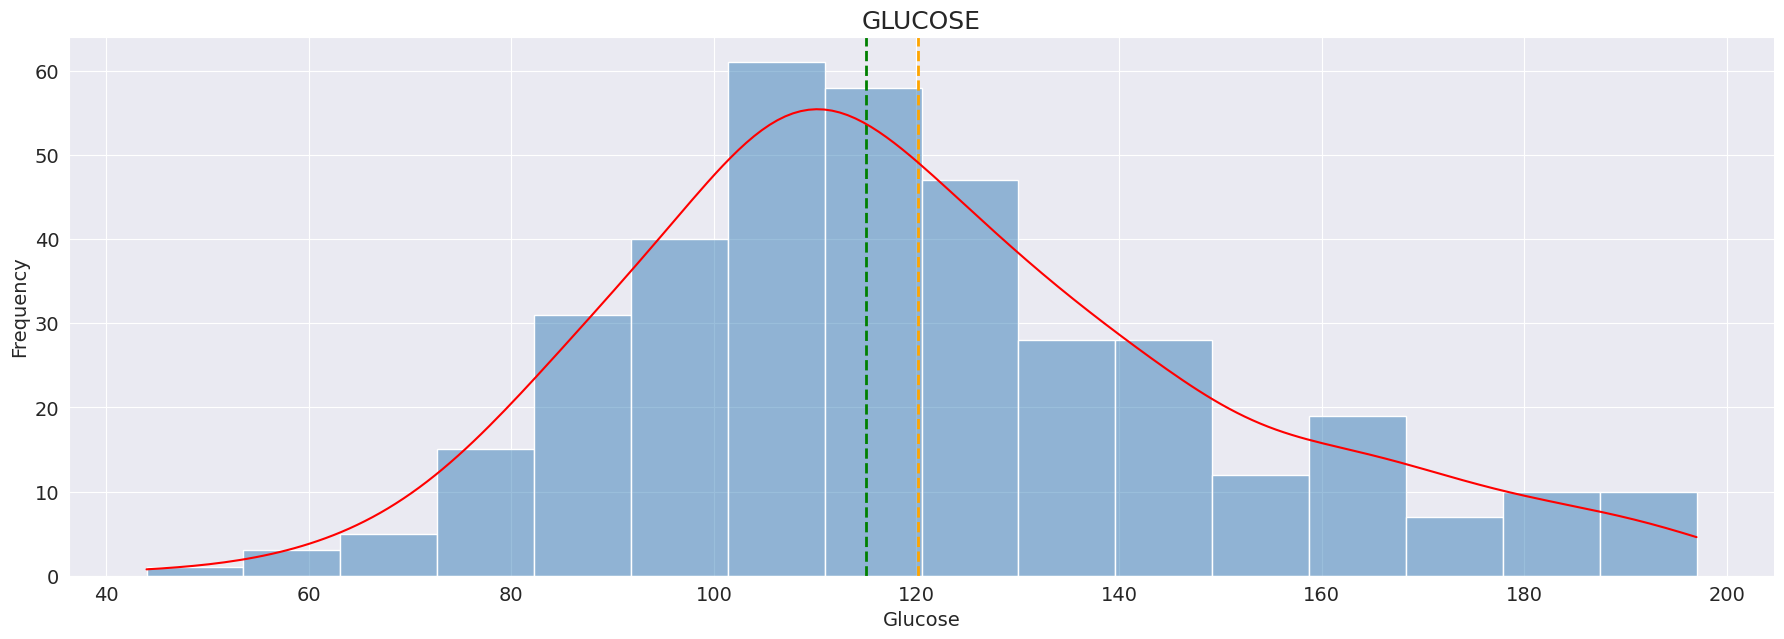

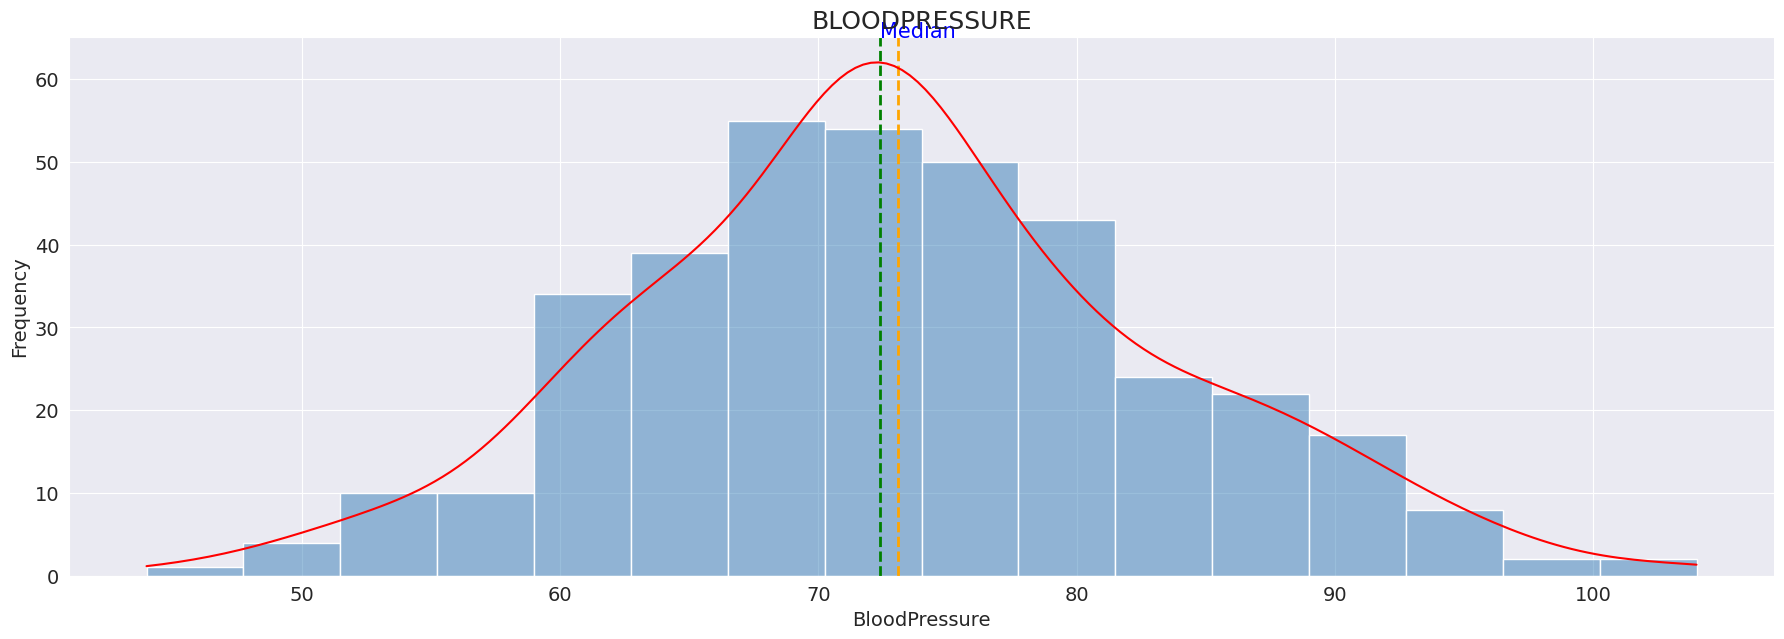

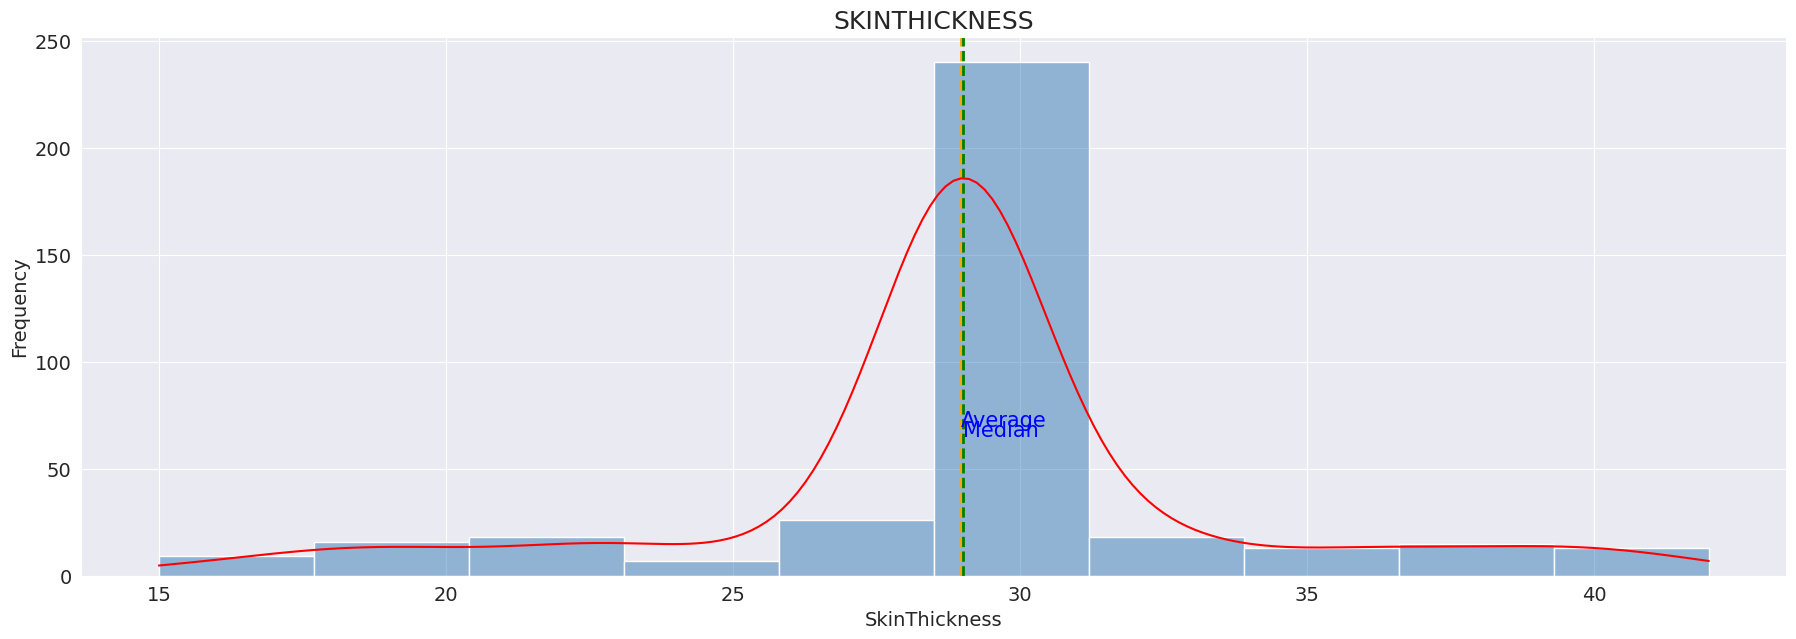

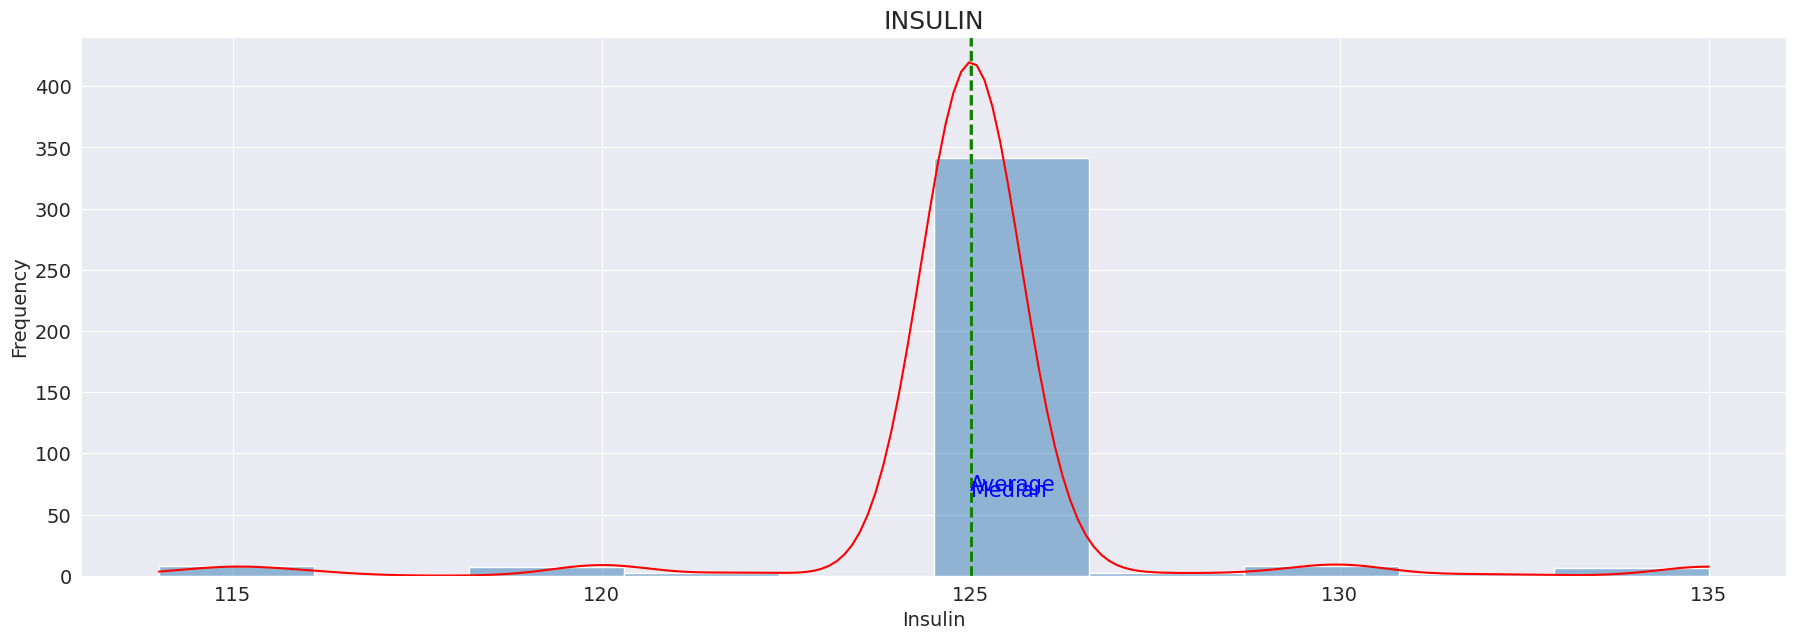

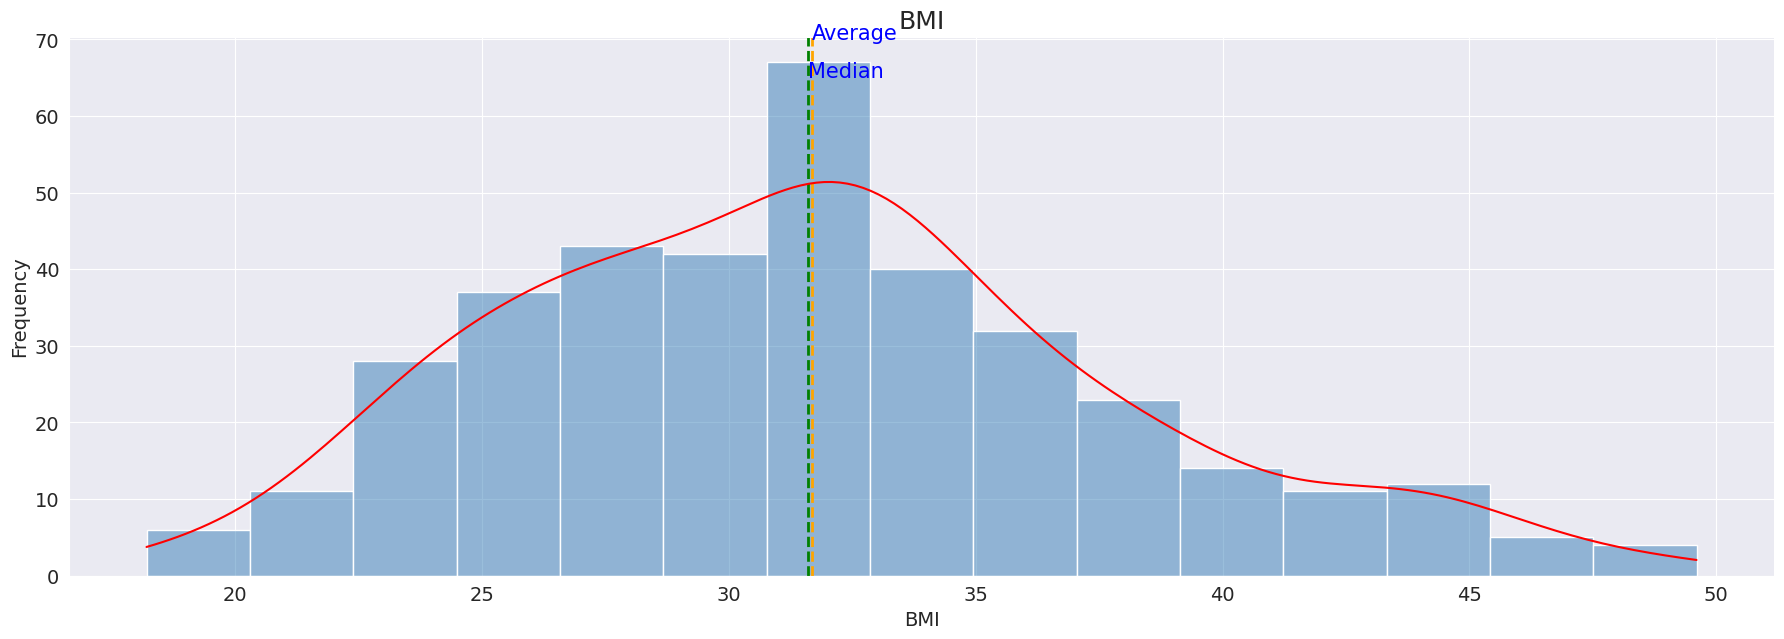

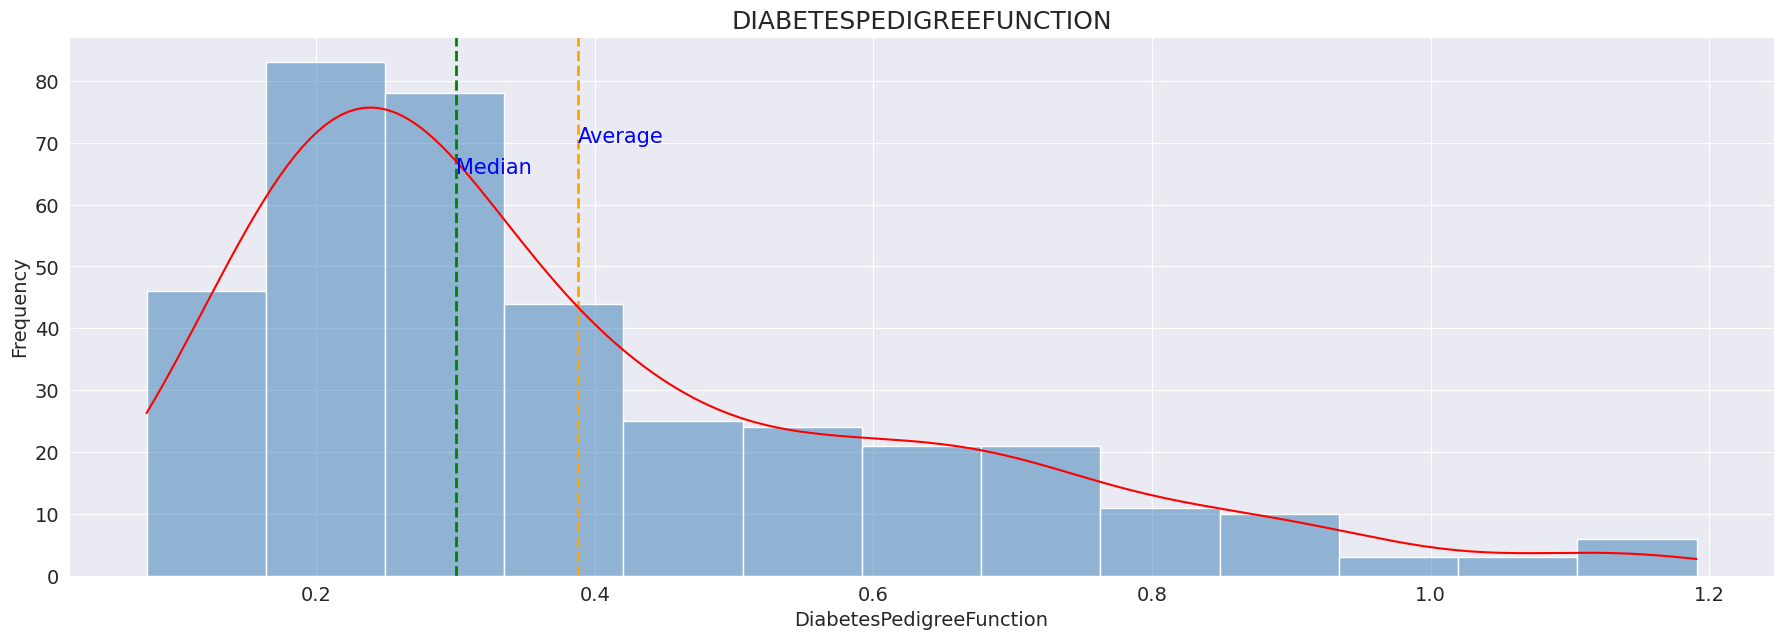

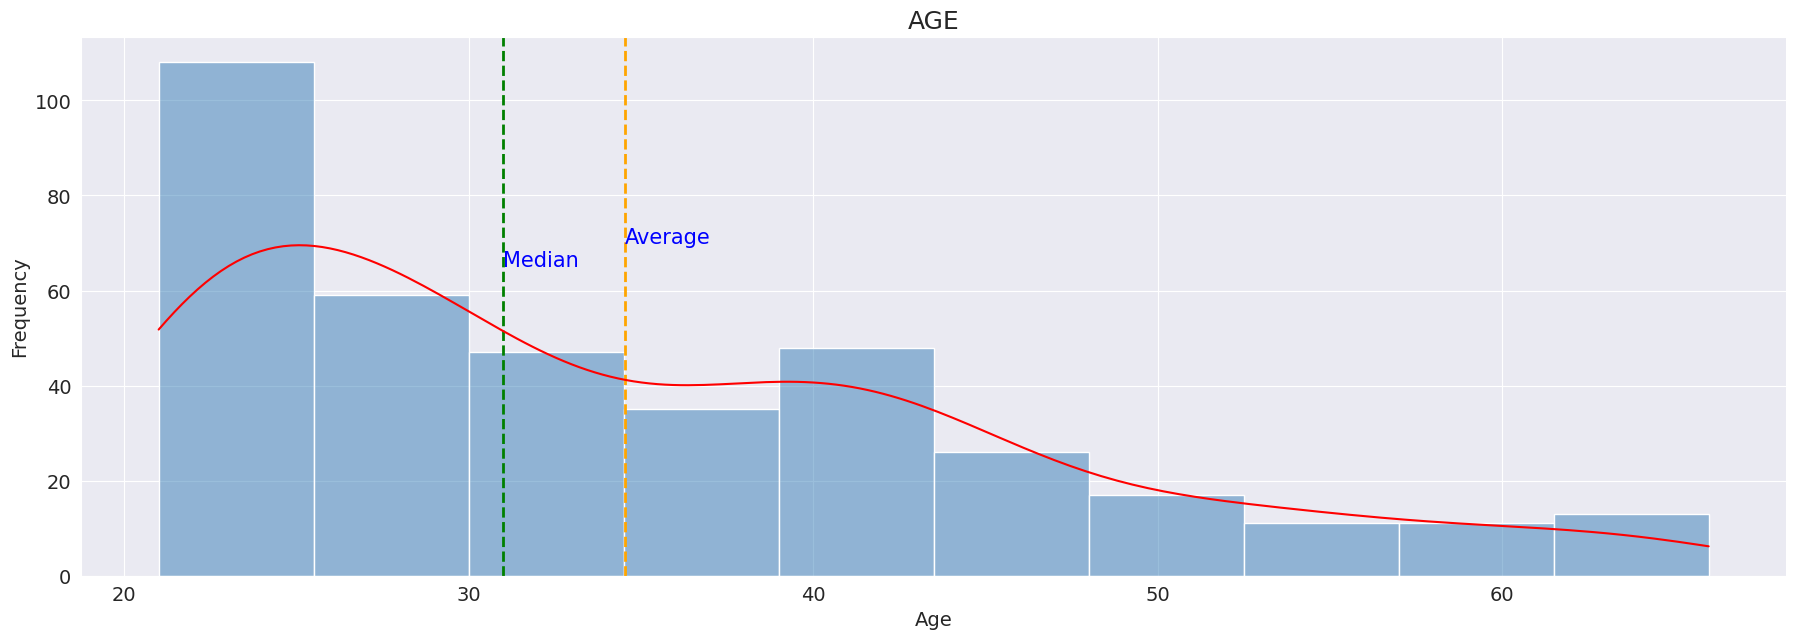

In [18]:
for col in diab_no_outliers.columns[:-1]:
  ax = sns.histplot(data = diab_no_outliers, x = col, kde = True, color=palette[1])
  ax.lines[0].set_color('red')
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.axvline(diab_no_outliers[col].mean(), linestyle='--',lw=2, zorder=1, color='orange')
  plt.annotate(f'Average', (diab_no_outliers[col].mean(), 70), fontsize=15, color='blue')
  plt.axvline(diab_no_outliers[col].median(), linestyle='--', lw= 2, zorder=1, color='green')
  plt.annotate(f'Median', (diab_no_outliers[col].median(), 65), fontsize=15, color='blue')
  plt.title(col.upper(), fontsize=18)
  plt.ylabel('Frequency', fontsize=14)
  plt.show()

In [19]:
diab.shape

(768, 9)

In [20]:
diab_no_outliers.shape

(375, 9)

### **Model Building & Training**

In [22]:
X = diab_no_outliers.drop('Outcome', axis=1)
y = diab_no_outliers['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize and fit a StandardScaler to the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [25]:
clf = RandomForestClassifier(random_state=21)
clf.fit(X_train_scaled, y_train)
y_pred_test = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

### **Model Assessment and Metrics**

In [26]:
# Evaluate the model as before
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report = classification_report(y_test, y_pred_test)
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

# Print the evaluation metrics
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print('-' * 30)
print(f"Accuracy Test: {accuracy_test:.2f}")
print(f"Accuracy Train: {accuracy_train:.2f}")
print('-' * 30)
print(f" Test Confusion Matrix: \n {conf_matrix_test}")
print('-' * 30)
print(f" Train Confusion Matrix: \n {conf_matrix_train}")
print('-' * 30)
print(f"Classification Report: \n {class_report}")

Cross-Validation Scores: [0.68333333 0.8        0.75       0.66666667 0.73333333]
Mean Accuracy: 0.7266666666666667
------------------------------
Accuracy Test: 0.77
Accuracy Train: 1.00
------------------------------
 Test Confusion Matrix: 
 [[40  6]
 [11 18]]
------------------------------
 Train Confusion Matrix: 
 [[191   0]
 [  0 109]]
------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        46
           1       0.75      0.62      0.68        29

    accuracy                           0.77        75
   macro avg       0.77      0.75      0.75        75
weighted avg       0.77      0.77      0.77        75

